In [1]:
feature_number = 20
test_size = 0.9
y_feature = 'resale_price'

In [13]:
import pandas as pd
import numpy as np
import time
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [3]:
train_data = pd.read_csv('flatPrices/train.csv').iloc[:-11905]
test_data = pd.read_csv('flatPrices/test.csv').iloc[:-11905]
X_train = train_data.drop(columns=y_feature)
y_train = train_data[y_feature]
X_test = test_data.drop(columns=y_feature)
y_test = test_data[y_feature]

In [7]:
columns = ['year','town','flat_type','block','latitude','longitude','area_sqm']

scaler = MinMaxScaler()
X_train[columns] = scaler.fit_transform(X_train[columns])
y_train = scaler.fit_transform(y_train.to_numpy().reshape(-1,1))
X_test[columns] = scaler.fit_transform(X_test[columns])
y_test = scaler.fit_transform(y_test.to_numpy().reshape(-1,1))

In [8]:
train_data

,year,town,flat_type,block,latitude,longitude,area_sqm,resale_price
0,0.233333,0.115385,0.50,0.0316,0.410705,0.164924,0.660550,298000.0
1,0.566667,0.423077,0.50,0.4564,0.561159,0.732921,0.559633,316000.0
2,0.400000,0.000000,0.25,0.3740,0.508661,0.566475,0.266055,196000.0
3,0.266667,0.500000,0.50,0.4504,0.418972,0.083386,0.541284,207000.0
4,0.600000,0.461538,0.75,0.0216,0.342928,0.121727,0.697248,415000.0
...,...,...,...,...,...,...,...,...
96,0.333333,0.961538,1.00,0.8600,0.933071,0.323811,0.990826,392000.0
97,0.066667,0.346154,0.25,0.3136,0.236742,0.240550,0.211009,89000.0
98,0.600000,0.730769,0.25,0.0516,0.172628,0.344204,0.192661,297000.0
99,0.133333,0.038462,0.25,0.5704,0.305951,0.878135,0.211009,111000.0


In [9]:
LR = LinearRegression()

In [10]:
start_time = time.time()
LR.fit(X_train, y_train)
elapsed_time = time.time() - start_time
print(f'Time spent to fit: {elapsed_time}')

start_time = time.time()
y_pred = LR.predict(X_test)
elapsed_time = time.time() - start_time
elapsed_time
print(f'Time spent to predict: {elapsed_time}' )

start_time = time.time()
score = LR.score(X_test, y_test)
elapsed_time = time.time() - start_time
print(f'score : {score} \ntime to score: {elapsed_time}' )

Time spent to fit: 0.004101991653442383
Time spent to predict: 0.0017333030700683594
score : 0.2864374345274133 
time to score: 0.0014967918395996094


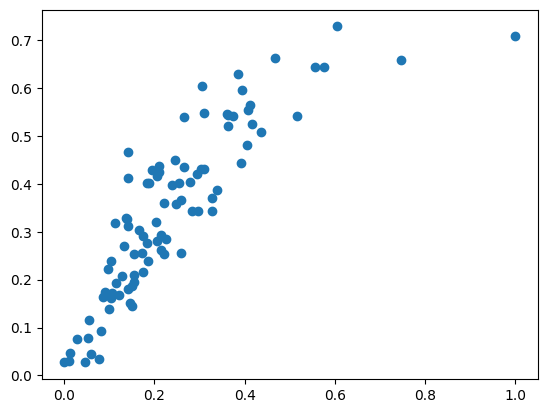

In [14]:
plt.scatter(y_test,y_pred)

In [11]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.11318222280830152
MSE: 0.01887119269798503
RMSE: 0.1373724597507995
